In [19]:
import json

from sqlalchemy import create_engine
import pandas as pd

from path import HERE

DB_PATH = HERE.joinpath('experiments/discrimination_detection_results11.db')
conn = create_engine(f'sqlite:///{DB_PATH}')
query = """
with s1 as (SELECT ex.experiment_id,
                   am.analysis_id,
                   am.method_name,
                   ex.status,
                   er.group_key,

                   json_extract(ex.config, '$.aequitas_global_iteration_limit') as aequitas_global_iteration_limit,
                   json_extract(ex.config, '$.aequitas_local_iteration_limit')  as aequitas_local_iteration_limit,
                   json_extract(ex.config, '$.aequitas_model_type')             as aequitas_model_type,
                   json_extract(ex.config, '$.aequitas_perturbation_unit')      as aequitas_perturbation_unit,
                   json_extract(ex.config, '$.aequitas_threshold')              as aequitas_threshold,
                   json_extract(ex.config, '$.bias_scan_favorable_value')       as bias_scan_favorable_value,
                   json_extract(ex.config, '$.bias_scan_mode')                  as bias_scan_mode,
                   json_extract(ex.config, '$.bias_scan_n_estimators')          as bias_scan_n_estimators,
                   json_extract(ex.config, '$.bias_scan_num_iters')             as bias_scan_num_iters,
                   json_extract(ex.config, '$.bias_scan_random_state')          as bias_scan_random_state,
                   json_extract(ex.config, '$.bias_scan_scoring')               as bias_scan_scoring,
                   json_extract(ex.config, '$.bias_scan_test_size')            as bias_scan_test_size,
                   json_extract(ex.config, '$.expga_max_global')                as expga_max_global,
                   json_extract(ex.config, '$.expga_max_local')                 as expga_max_local,
                   json_extract(ex.config, '$.expga_threshold')                 as expga_threshold,
                   json_extract(ex.config, '$.expga_threshold_rank')            as expga_threshold_rank,
                   json_extract(ex.config, '$.max_group_size')                  as max_group_size,
                   json_extract(ex.config, '$.max_number_of_classes')           as max_number_of_classes,
                   json_extract(ex.config, '$.min_number_of_classes')           as min_number_of_classes,
                   json_extract(ex.config, '$.mlcheck_iteration_no')            as mlcheck_iteration_no,
                   json_extract(ex.config, '$.nb_attributes')                   as nb_attributes,
                   json_extract(ex.config, '$.nb_categories_outcome')           as nb_categories_outcome,
                   json_extract(ex.config, '$.nb_groups')                       as nb_groups,
                   json_extract(ex.config, '$.prop_protected_attr')             as prop_protected_attr,

                   CAST(er.calculated_granularity AS float)                     AS calculated_granularity,
                   CAST(er.calculated_group_size AS float)                      AS calculated_group_size,
                   CAST(er.calculated_intersectionality AS float)               AS calculated_intersectionality,
                   CAST(er.calculated_magnitude AS float)                       AS calculated_magnitude,
                   CAST(er.calculated_similarity AS float)                      AS calculated_similarity,
                   CAST(er.calculated_subgroup_ratio AS float)                  AS calculated_subgroup_ratio,

                   CAST(er.calculated_epistemic_random_forest AS float)         AS calculated_epistemic_random_forest,
                   CAST(er.calculated_aleatoric_random_forest AS float)         AS calculated_aleatoric_random_forest,
                   CAST(er.calculated_epistemic_random_forest_median AS float)  AS calculated_epistemic_random_forest_median,
                   CAST(er.calculated_aleatoric_random_forest_median AS float)  AS calculated_aleatoric_random_forest_median,

                   CAST(er.synthetic_group_size AS integer)                     AS synthetic_group_size,
                   CAST(er.nb_unique_indv AS integer)                          AS nb_unique_indv,

                   CAST(er.num_exact_couple_matches AS integer)                 AS num_exact_couple_matches,
                   CAST(er.num_new_group_couples AS integer)                    AS num_new_group_couples,
                   num_new_group_couples / CAST(nb_unique_indv AS FLOAT)        as prop_of_new_individuals_found,
                   num_exact_couple_matches / CAST(nb_unique_indv AS FLOAT)     as prop_of_orig_individuals_found


            FROM experiments ex
                     join main.analysis_metadata am on ex.experiment_id = am.experiment_id
                     left join main.evaluated_results er on am.analysis_id = er.analysis_id
            WHERE status = 'completed')
SELECT *
FROM s1
"""

df = pd.read_sql_query(query, conn)
df = df.loc[:, ~df.T.duplicated()]
# df = df[(~df['prop_of_new_individuals_found'].isna())&(~df['prop_of_orig_individuals_found'].isna())]
df

,experiment_id,analysis_id,method_name,status,group_key,aequitas_global_iteration_limit,aequitas_local_iteration_limit,aequitas_model_type,aequitas_perturbation_unit,aequitas_threshold,...,calculated_subgroup_ratio,calculated_epistemic_random_forest,calculated_aleatoric_random_forest,calculated_epistemic_random_forest_median,calculated_aleatoric_random_forest_median,nb_unique_indv,num_exact_couple_matches,num_new_group_couples,prop_of_new_individuals_found,prop_of_orig_individuals_found
0,5c5f472d-4091-4390-a356-e4c01804fbea,4582f18f-344a-4137-ab76-f62203794a29,biasscan,completed,*|*|*|*|*|*|*|*|*|1|*|*|*|*|0-*|*|*|*|*|*|*|*|...,100,10,RandomForest,1.0,0.0,...,0.198948,0.048304,0.123499,0.046874,0.129201,708,0,0,0.0,0.0
1,5c5f472d-4091-4390-a356-e4c01804fbea,4582f18f-344a-4137-ab76-f62203794a29,biasscan,completed,*|*|*|*|*|0|*|*|2|*|0|*|*|*|2-*|*|*|*|*|0|*|*|...,100,10,RandomForest,1.0,0.0,...,0.365392,0.044949,0.139906,0.041679,0.150382,371,0,0,0.0,0.0
2,5c5f472d-4091-4390-a356-e4c01804fbea,4582f18f-344a-4137-ab76-f62203794a29,biasscan,completed,*|*|*|*|*|0|*|2|*|1|0|*|1|1|0-*|*|*|*|*|0|*|3|...,100,10,RandomForest,1.0,0.0,...,0.366457,0.042177,0.118338,0.035321,0.119813,722,0,0,0.0,0.0
3,5c5f472d-4091-4390-a356-e4c01804fbea,4582f18f-344a-4137-ab76-f62203794a29,biasscan,completed,*|*|*|*|*|1|0|*|1|3|2|*|0|*|*-*|*|*|*|*|1|1|*|...,100,10,RandomForest,1.0,0.0,...,0.087207,0.037784,0.146348,0.030685,0.154319,249,0,0,0.0,0.0
4,5c5f472d-4091-4390-a356-e4c01804fbea,4582f18f-344a-4137-ab76-f62203794a29,biasscan,completed,*|*|*|*|0|*|*|0|1|*|0|1|*|*|1-*|*|*|*|2|*|*|3|...,100,10,RandomForest,1.0,0.0,...,0.477279,0.040272,0.155730,0.037433,0.170307,184,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38170,69f2d767-1c5b-4473-8640-02dee23773e5,fa92653a-2e71-4cde-a2c5-5fb5d612e173,mlcheck,completed,2|*|3|3|0|*|2|1-2|*|0|3|1|*|2|0,100,10,RandomForest,1.0,0.0,...,0.076904,0.040072,0.095171,0.021819,0.077274,86,0,0,0.0,0.0
38171,69f2d767-1c5b-4473-8640-02dee23773e5,fa92653a-2e71-4cde-a2c5-5fb5d612e173,mlcheck,completed,2|1|*|*|1|3|1|*-0|0|*|*|2|0|1|*,100,10,RandomForest,1.0,0.0,...,0.208170,0.047911,0.119644,0.040050,0.113397,134,0,0,0.0,0.0
38172,69f2d767-1c5b-4473-8640-02dee23773e5,fa92653a-2e71-4cde-a2c5-5fb5d612e173,mlcheck,completed,2|1|*|0|2|3|2|*-1|0|*|0|0|0|0|*,100,10,RandomForest,1.0,0.0,...,0.343679,0.038520,0.096908,0.026681,0.081473,93,0,0,0.0,0.0
38173,69f2d767-1c5b-4473-8640-02dee23773e5,fa92653a-2e71-4cde-a2c5-5fb5d612e173,mlcheck,completed,2|1|*|3|*|*|2|1-1|0|*|2|*|*|0|0,100,10,RandomForest,1.0,0.0,...,0.299764,0.042183,0.094135,0.022889,0.090156,114,0,0,0.0,0.0


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def analyze_treatment_effects(df):
    # Get calculated columns (treatments) and outcome columns for couples
    treatment_cols = [col for col in df.columns if col.startswith('calculated_')]
    outcome_cols = ['num_exact_couple_matches', 'num_new_group_couples']

    # Initialize results dictionary
    results = {
        'treatment_effects': {},
        'correlations': {},
        'significance': {}
    }

    # Standardize treatment variables
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(df[treatment_cols]), columns=treatment_cols)

    # Analyze each outcome
    for outcome in outcome_cols:
        y = df[outcome]

        # 1. Basic correlation analysis
        correlations = {}
        for treatment in treatment_cols:
            corr, p_value = stats.pearsonr(df[treatment], y)
            correlations[treatment] = {
                'correlation': corr,
                'p_value': p_value
            }

        # 2. CATE Analysis using Random Forest
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

        treatment_effects = {}
        for treatment in treatment_cols:
            # Create binary treatment indicator (above/below median)
            treatment_median = df[treatment].median()
            T = (df[treatment] > treatment_median).astype(int)

            # Prepare features (excluding current treatment)
            X_subset = X.drop(columns=[treatment])

            # Fit model
            rf_model.fit(X_subset, y)

            # Calculate CATE
            treated_effect = rf_model.predict(X_subset[T == 1]).mean()
            control_effect = rf_model.predict(X_subset[T == 0]).mean()
            ate = treated_effect - control_effect

            treatment_effects[treatment] = {
                'ATE': ate,
                'treated_mean': treated_effect,
                'control_mean': control_effect
            }

        results['treatment_effects'][outcome] = treatment_effects
        results['correlations'][outcome] = correlations

    return results

def plot_treatment_effects(results):
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))
    
    outcome_labels = {
        'num_exact_couple_matches': 'Number of Exact Couple Matches',
        'num_new_group_couples': 'Number of New Group Couples'
    }

    for idx, outcome in enumerate(results['treatment_effects'].keys()):
        treatments = list(results['treatment_effects'][outcome].keys())
        effects = [results['treatment_effects'][outcome][t]['ATE'] for t in treatments]

        # Plot treatment effects
        ax = axes[idx]
        bars = ax.barh(treatments, effects)
        ax.set_title(f'Treatment Effects on {outcome_labels[outcome]}')
        ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

        # Add correlation values as text
        for i, treatment in enumerate(treatments):
            corr = results['correlations'][outcome][treatment]['correlation']
            p_val = results['correlations'][outcome][treatment]['p_value']
            ax.text(effects[i], i, f'r={corr:.2f} (p={p_val:.3f})',
                   verticalalignment='center')

    plt.tight_layout()
    return fig

In [22]:
# Run analysis
results = analyze_treatment_effects(df)

In [23]:
results

{'treatment_effects': {'num_exact_couple_matches': {'calculated_granularity': {'ATE': np.float64(0.05712016931831469),
    'treated_mean': np.float64(0.17396388742175167),
    'control_mean': np.float64(0.11684371810343698)},
   'calculated_group_size': {'ATE': np.float64(0.12093325641778713),
    'treated_mean': np.float64(0.20540868527999712),
    'control_mean': np.float64(0.08447542886220999)},
   'calculated_intersectionality': {'ATE': np.float64(-0.028649656125571993),
    'treated_mean': np.float64(0.13011446464232768),
    'control_mean': np.float64(0.15876412076789967)},
   'calculated_magnitude': {'ATE': np.float64(0.08847972172028477),
    'treated_mean': np.float64(0.18932564606265675),
    'control_mean': np.float64(0.10084592434237198)},
   'calculated_similarity': {'ATE': np.float64(0.017707858728464754),
    'treated_mean': np.float64(0.1540709195924837),
    'control_mean': np.float64(0.13636306086401895)},
   'calculated_subgroup_ratio': {'ATE': np.float64(0.017376272

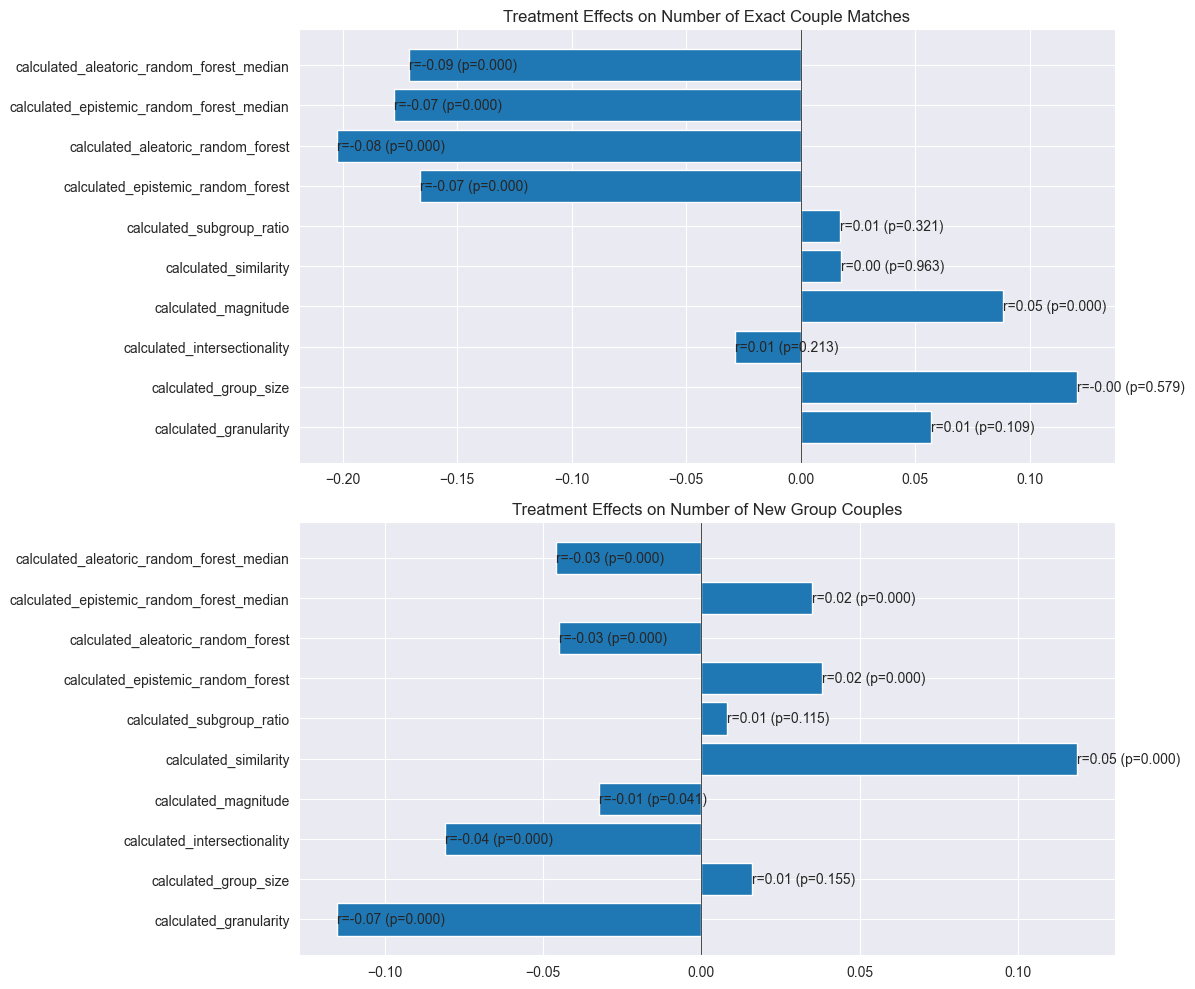

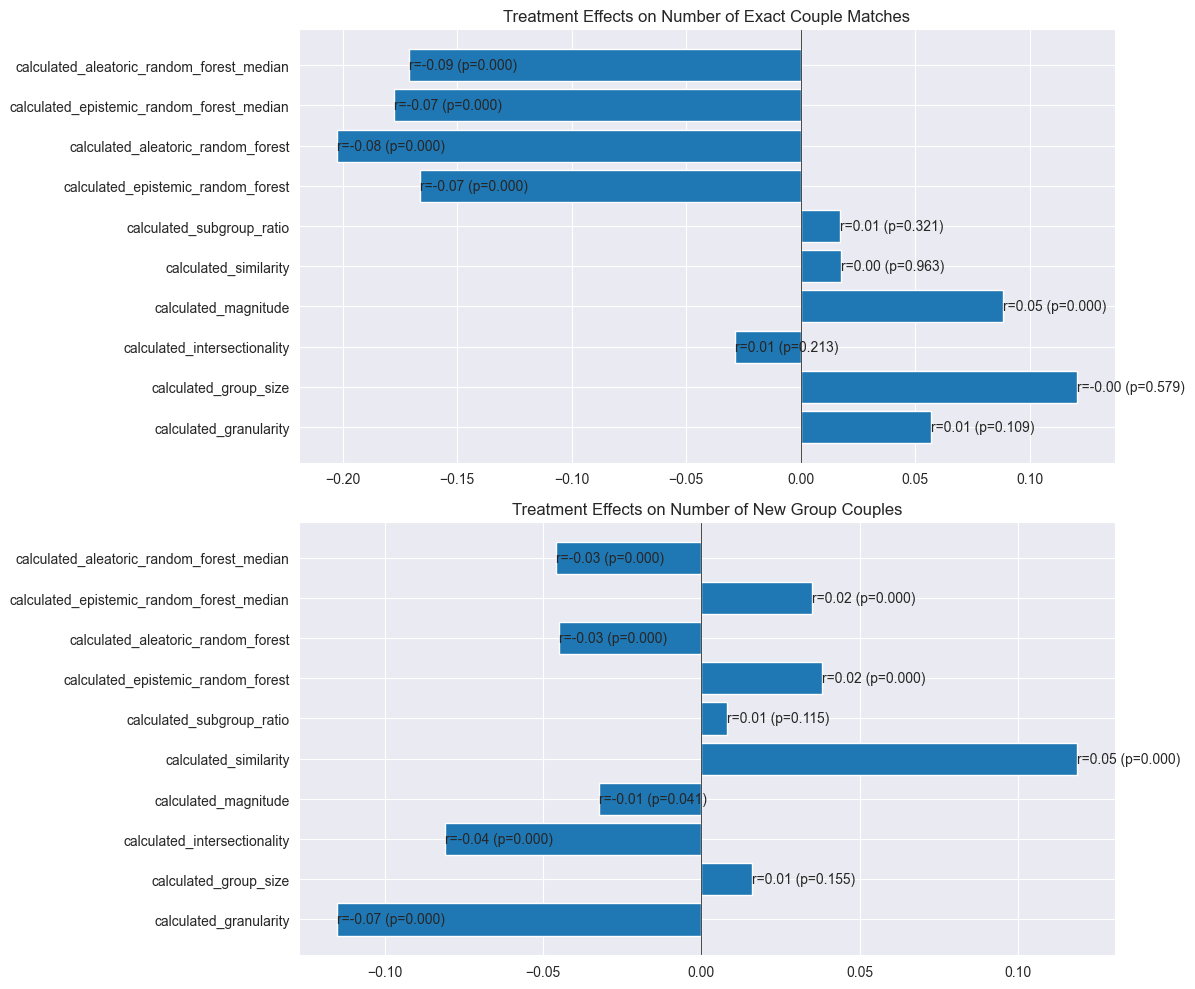

In [25]:
# Create visualization
plot_treatment_effects(results)